# Exercise 4.10 Coding Etiquette & Excel Reporting 

# Table Of Contents

## Part 2

6. Create an appropriate visualization to show the distribution of profiles.

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Assign Path
path = r'/Users/andrew/Documents/Data Analyst Course/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [4]:
# Data imported from part 1
df_prods_ords_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'prods_ords_customers_profiles.pkl'))

In [5]:
df_prods_ords_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,income,_merge,Region,exclusion_flag,age_bracket,income_range,parental_status,sales_performance,weekday,time_of_day
0,2539329,1,1,2,8,NaN,True,196,1,0,...,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning


In [6]:
pd.options.display.max_columns = None

In [98]:
df_prods_ords_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,State,Age,date_joined,Dependants,fam_status,income,_merge,Region,exclusion_flag,age_bracket,income_range,parental_status,sales_performance,weekday,time_of_day,department_name,Selling_Performance,Department Performance,price_range_loc
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning,beverages,Currently not assigned,Top Performing Department,Mid-range product
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning,dairy eggs,Currently not assigned,Top Performing Department,Mid-range product
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning,snacks,Currently not assigned,Average Performing Department,Low-range product
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning,snacks,Currently not assigned,Average Performing Department,Low-range product
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Most orders,10,New customer,6.367797,Lower spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,31-40,040000-086000,parent,Not yet assigned,Monday,Morning,households,Currently not assigned,Average Performing Department,Low-range product


In [7]:
# Department_id column only has the ID of department but not the name, need to create a Department Name column

In [9]:
# Import department data to get department names
df_dep = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'departments.csv'), index_col = False)

In [10]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [11]:
# Transpose this
df_dep = df_dep.T

In [12]:
new_header = df_dep.iloc[0]

In [13]:
df_dep = df_dep[1:]

In [14]:
df_dep.columns = new_header #set the header row as the df header

In [15]:
df_dep

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [16]:
# Create a new column for department names 

df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 1, 'department_name'] = 'frozen'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 2, 'department_name'] = 'other'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 3, 'department_name'] = 'bakery'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 4, 'department_name'] = 'produce'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 5, 'department_name'] = 'alcohol'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 6, 'department_name'] = 'international'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 7, 'department_name'] = 'beverages'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 8, 'department_name'] = 'pets'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 10, 'department_name'] = 'bulk'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 11, 'department_name'] = 'personal care'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 12, 'department_name'] = 'meat seafood'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 13, 'department_name'] = 'pantry'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 14, 'department_name'] = 'breakfast'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 15, 'department_name'] = 'canned goods'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 17, 'department_name'] = 'households'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 18, 'department_name'] = 'babies'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 19, 'department_name'] = 'snacks'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 20, 'department_name'] = 'deli'
df_prods_ords_customers.loc[df_prods_ords_customers['department_id'] == 21, 'department_name'] = 'missing'

# Key Question: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [17]:
# Find total sales by product name
df_sales_product_name = df_prods_ords_customers.groupby('product_name').agg({'prices' : ['min', 'mean', 'max','sum']})

In [18]:
df_sales_product_name.to_clipboard()

Identified top 20 best selling items and will define them in a list below with a flag to identify them for marketing purposes. These 20 items make up almost 13% of total sales.

In [19]:
# Create a list of the top 20 selling products
top_prods = ["Banana", "Bag of Organic Bananas", "Large Lemon", "Limes", "Organic Baby Spinach", "Organic Strawberries", "Organic Whole Milk", "Cucumber Kirby", "Apple Honeycrisp Organic", "Organic Cucumber", "Organic Avocado", "Asparagus", "Organic Baby Carrots", "Michigan Organic Kale", "Organic Hass Avocado", "Organic Tomato Cluster", "Organic Blueberries", "Organic Zucchini", "Half & Half", "Carrots"]

In [20]:
# Create a loop to flag these items
result = []

for value in df_prods_ords_customers['product_name']:
    if value in top_prods:
        result.append('Top 20 selling product')
    else:
        result.append('Currently not assigned')

In [21]:
result

['Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Top 20 selling product',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Top 20 selling product',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 

In [22]:
# Create new column to flag these products
df_prods_ords_customers['Selling_Performance'] = result

In [23]:
# Check count of this flag
df_prods_ords_customers['Selling_Performance'].value_counts()

Currently not assigned    29369372
Top 20 selling product     3065687
Name: Selling_Performance, dtype: int64

In [26]:
# Create subset of top 20 selling products only
df_top_selling_prods = df_prods_ords_customers[df_prods_ords_customers['Selling_Performance']=='Top 20 selling product']

In [27]:
# check that only top 20 selling products are in this subset
df_top_selling_prods['Selling_Performance'].value_counts()

Top 20 selling product    3065687
Name: Selling_Performance, dtype: int64

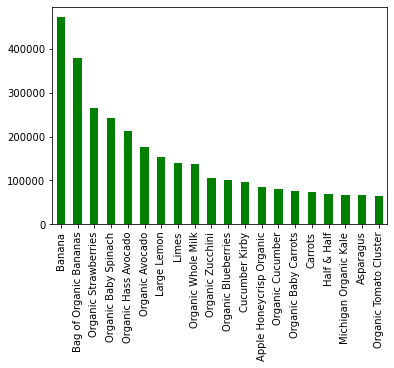

In [34]:
# Create a bar chart to represent these 20 products
bar_top_20_prods = df_top_selling_prods['product_name'].value_counts().plot.bar(color = 'Green')

In [35]:
# Export chart 
bar_top_20_prods.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_20_selling_prods.jpeg'), bbox_inches = 'tight')

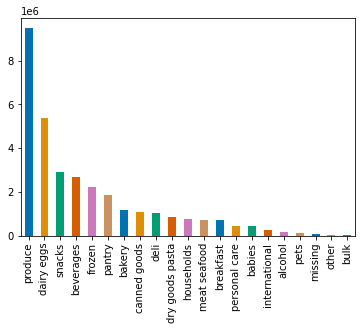

In [37]:
# Exploring the different departments
top_deps = df_prods_ords_customers['department_name'].value_counts().plot.bar(color = sns.color_palette("colorblind", 6))

In [38]:
# Export chart 
top_deps.figure.savefig(os.path.join(path,'Analysis','Visualizations','overall_departments_performance.jpeg'), bbox_inches = 'tight')

In [39]:
# What are the top 5 best performing departments
df_top_5_dept = df_prods_ords_customers.groupby('department_name').agg({'prices': ['sum']})

In [40]:
df_top_5_dept.to_clipboard()

Top 5 performing departments are: produce, dairy eggs, beverages, frozen and pantry. These departments make up almost 69% of total sales so the rest of this analysis will focus on these products and the different customer profiles.

In [41]:
# Create a flag to highlight these top 5 departments
result = []

for value in df_prods_ords_customers['department_name']:
    if value == 'produce':
        result.append('Top Performing Department')
    elif value == 'dairy eggs':
        result.append('Top Performing Department')
    elif value == 'beverages':
        result.append('Top Performing Department')
    elif value == 'frozen':
        result.append('Top Performing Department')
    elif value == 'pantry':
        result.append('Top Performing Department')
    else:
        result.append('Average Performing Department')

In [42]:
result

['Top Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Top Performing Department',
 'Average Performing Department',
 'Average 

In [43]:
df_prods_ords_customers['Department Performance'] = result

In [44]:
df_prods_ords_customers['Department Performance'].value_counts(dropna = False)

Top Performing Department        21676273
Average Performing Department    10758786
Name: Department Performance, dtype: int64

In [45]:
# Create subset of high performing departments
top_5_departments = df_prods_ords_customers[df_prods_ords_customers['Department Performance']=='Top Performing Department']

In [24]:
# Check only top performing departments are in subset
top_5_departments.shape

(21676273, 41)

Text(0, 0.5, '')

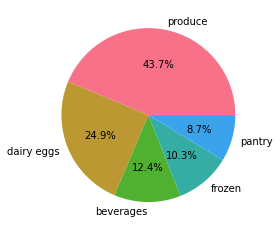

In [46]:
# Create a pie chart to visually compare the sales of these top 5 departments against each other
Top_5_pie_chart = top_5_departments['department_name'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("husl"))
plt.ylabel('')

In [47]:
# Export this chart
Top_5_pie_chart.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_departments_breakdown.png'),bbox_inches = 'tight' )

## Parental Status And Family Status

In [48]:
# What days are parents more likely to order?
parents_order_day = pd.crosstab(df_prods_ords_customers['weekday'], df_prods_ords_customers['parental_status'], dropna = False)

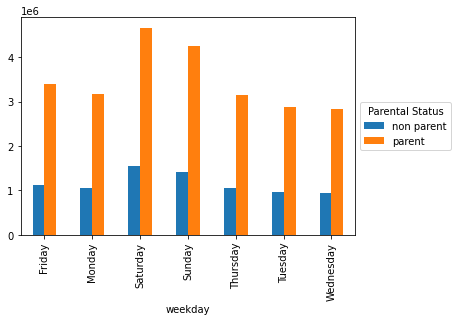

In [49]:
bar_parents_order_day = parents_order_day.plot(kind='bar')
plt.legend(title = 'Parental Status',loc='center left', bbox_to_anchor=(1, 0.5))

Saturday and Sunday appear to be the most common days that parents place orders

In [50]:
# Export this chart
bar_parents_order_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Parents_order_day.png'), bbox_inches = 'tight')

In [51]:
# Parental Status and Number of Orders

In [52]:
top_5_departments.groupby('parental_status').agg({'order_number': ['mean']})

,order_number
,mean
parental_status,
non parent,17.478447
parent,17.311933


No major difference between average orders of parents and non parents. 

In [ ]:
# Does family status have an impact for consumers?

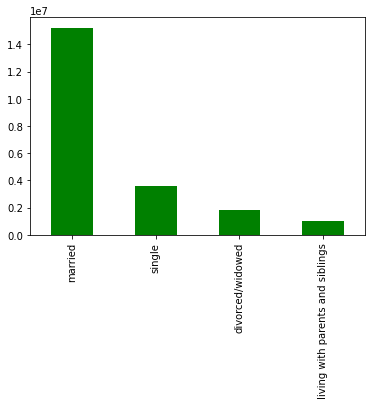

In [53]:
fam_status_breakdown = top_5_departments['fam_status'].value_counts().plot.bar(color='Green')

In [54]:
# Export this graph
fam_status_breakdown.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'fam_status_breakdown.png'), bbox_inches = 'tight')

Marketing should target married customers

In [55]:
# How do the different departments compare when it comes to family status?

In [56]:
# create crosstab of department_name and fam_status
fam_status_crosstab = pd.crosstab(df_prods_ords_customers['department_name'], df_prods_ords_customers['fam_status'], dropna = False)

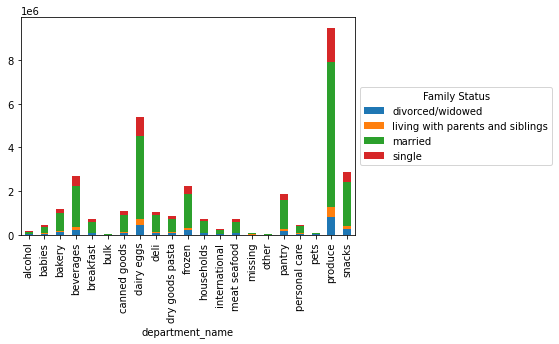

In [57]:
# create bar chart to visualize this crossbar
bar_fam_status_department = fam_status_crosstab.sort_index().plot(kind='bar', stacked=True)
plt.legend(title = 'Family Status',loc='center left', bbox_to_anchor=(1, 0.5))

In [58]:
# Export this chart
bar_fam_status_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Fam_Status_Department.png'), bbox_inches = 'tight')

# Customers Age and department 

In [59]:
# Create a crosstab of age_bracket and department based off the top 5 departments subset created earlier
df_age_prod = pd.crosstab(top_5_departments['department_name'], top_5_departments['age_bracket'], dropna = False)

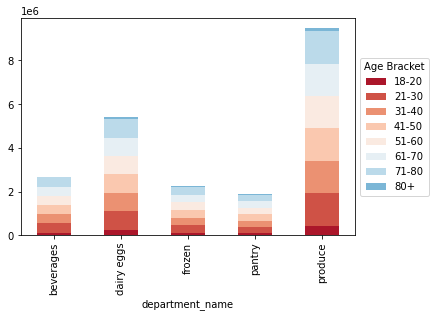

In [60]:
# Create a bar chart to visualize the findings
bar_age_prod = df_age_prod.plot(kind='bar', stacked = True, color = sns.color_palette("RdBu", 10))
plt.legend(title = 'Age Bracket',loc='center left', bbox_to_anchor=(1, 0.5))

In [61]:
# Export this graph
bar_age_prod.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Age_Department.png'), bbox_inches = 'tight')

In [62]:
# Age and total orders - is there a difference between age brackets?

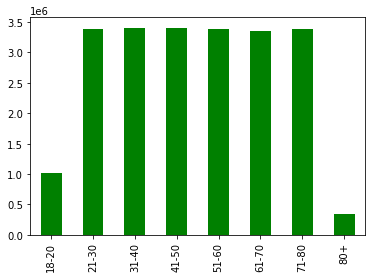

In [63]:
# Create bar chart to visualize findings 
bar_age_total_orders = top_5_departments['age_bracket'].value_counts().sort_index().plot.bar(color = "green")

Ages 18-20 and 80+ are outliers in their number of orders

In [64]:
# Export this graph
bar_age_total_orders.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Age_Total_Orders.png'), bbox_inches = 'tight')

# Key Question - The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

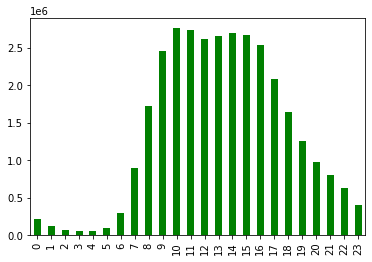

In [65]:
# Find out the busiest times of the day for orders
bar_busiest_time_day = df_prods_ords_customers['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'Green')

Orders increase rapidly from 7am onwards before peaking at 10am and maintaining this level until 4pm when orders gradually drop during the evening. Opportunity for more targeted ads based on this finding. 

In [66]:
# Export this chart
bar_busiest_time_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Busiest_Time_Day.png'), bbox_inches = 'tight')

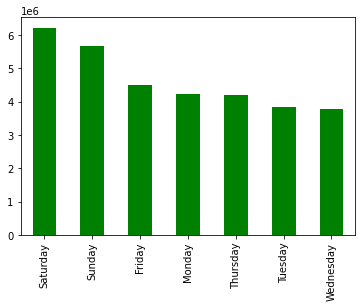

In [67]:
# What days of the week do most orders occur?
busiest_order_day = df_prods_ords_customers['weekday'].value_counts().plot.bar(color = 'Green')

Saturday and Sunday are the busiest days of the week, another opportunity for targeted advertising during this time. 

In [68]:
# Export this chart
busiest_order_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Busiest_Order_Day.png'), bbox_inches = 'tight')

In [69]:
# What are the busiest time of day for each of top performing departments? 
df_top5_dept_busiest_time = pd.crosstab(top_5_departments['department_name'], top_5_departments['time_of_day'], dropna = False)

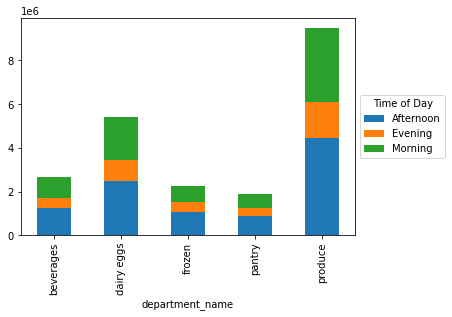

In [70]:
bar_df_top5_dept_busiest_time = df_top5_dept_busiest_time.plot(kind='bar', stacked=True)
plt.legend(title = 'Time of Day',loc='center left', bbox_to_anchor=(1, 0.5))

Afternoons appear to be the busiest period of the day for all departments (defined as between 12pm and 5pm)

In [71]:
# Export this chart
bar_df_top5_dept_busiest_time.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Top_Dept_Busiest_Time.png'), bbox_inches = 'tight')

In [72]:
# What are the busiest days of the week across the top 5 departments?
df_top5_dept_busiest_day = pd.crosstab(top_5_departments['department_name'], top_5_departments['weekday'], dropna = False)

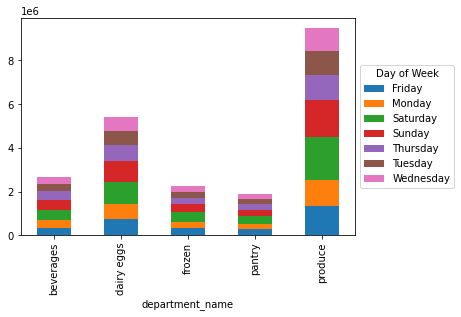

In [73]:
bar_df_top5_dept_busiest_day = df_top5_dept_busiest_day.plot(kind='bar', stacked=True)
plt.legend(title = 'Day of Week',loc='center left', bbox_to_anchor=(1, 0.5))

Saturday and Sunday appear to be consistently the busiest days of the week across all top 5 performing departments

In [74]:
# Export this chart
bar_df_top5_dept_busiest_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Top_Dept_Busiest_Day.png'), bbox_inches = 'tight')

# Key Question: They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [75]:
# Determine mean price per hour
hourly_spend = df_prods_ords_customers.groupby('order_hour_of_day').agg({'prices': ['mean']})

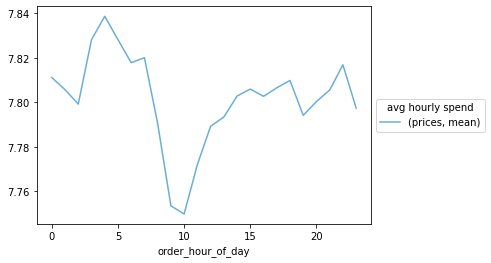

In [81]:
# Plot the mean prices per hour on a line graph
line_graph_hourly_spend = hourly_spend.plot.line(color = sns.color_palette('Blues',1))
plt.legend(title = 'avg hourly spend',loc='center left', bbox_to_anchor=(1, 0.5))

In [82]:
# Export this chart
line_graph_hourly_spend.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Average_Hourly_Spend.png'), bbox_inches = 'tight')

# Income and Departments

In [83]:
# Create a crosstab between department_name and income_range
df_income_top_dept = pd.crosstab(top_5_departments['department_name'], top_5_departments['income_range'], dropna = False)

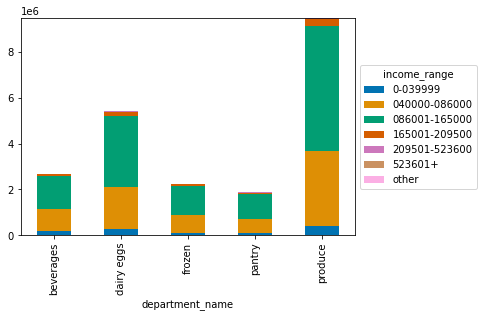

In [84]:
# Create bar chart to visualize the crosstab
bar_df_income_top_dept = df_income_top_dept.plot(kind='bar', stacked=True, color = sns.color_palette('colorblind', 7))
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))

Customers with incomes between 40k - 165k make up the majority of sales

In [85]:
# Export this chart
bar_df_income_top_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Income_Top_Depts.png'), bbox_inches = 'tight')

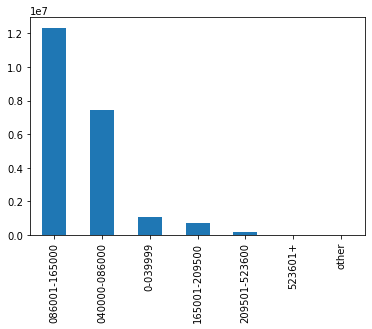

In [86]:
income_breakdown = top_5_departments['income_range'].value_counts().plot.bar()

In [87]:
# Export this graph
income_breakdown.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Income_Breakdown.png'), bbox_inches = 'tight')

Another bar graph to confirm that customers with incomes between 40k - 165k make up the majority of sales. 

In [108]:
    product_pricing = df_prods_ords_customers['price_range_loc'].value_counts()

In [109]:
product_pricing

Mid-range product     21860860
Low-range product     10126321
High-range product      412551
Name: price_range_loc, dtype: int64

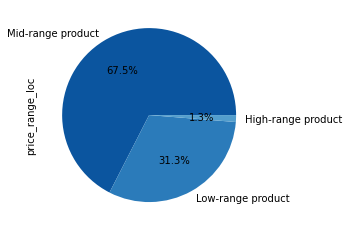

In [113]:
pie_product_pricing = product_pricing.plot.pie(autopct='%1.1f%%', colors = sns.color_palette("Blues_r"))

In [114]:
# Export this graph
pie_product_pricing.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Product_Pricing.png'), bbox_inches = 'tight')

In [117]:
# Export this graph
pie_df_spending.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Spending Habit.png'), bbox_inches = 'tight')

In [118]:
# Customer loyalty 
cust_loyalty = df_prods_ords_customers['loyalty_flag'].value_counts(dropna = False)

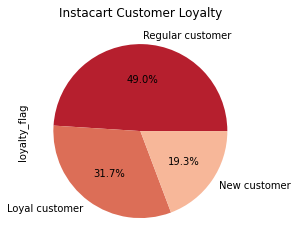

In [119]:
# Create pie chart of this customer loyalty flag
pie_cust_loyalty = cust_loyalty.plot.pie(autopct='%1.1f%%', colors = sns.color_palette("RdBu", 8), title = "Instacart Customer Loyalty")

In [120]:
# Export this graph
pie_cust_loyalty.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Customer Loyalty.png'), bbox_inches = 'tight')

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [121]:
# Age and order number
age_order = df_prods_ords_customers.groupby('age_bracket').agg({'order_number': ['mean', 'max', 'min']})

In [78]:
age_order.to_clipboard()

In [79]:
# Age and prices
age_price = df_prods_ords_customers.groupby('age_bracket').agg({'prices': ['mean', 'max', 'min']})

In [80]:
age_price.to_clipboard()

In [81]:
# Income and order number
income_order = df_prods_ords_customers.groupby('income_range').agg({'order_number': ['mean', 'max', 'min']})

In [82]:
income_order.to_clipboard()

In [83]:
# Income and prices
income_prices = df_prods_ords_customers.groupby('income_range').agg({'prices': ['mean', 'max', 'min']})

In [84]:
income_prices.to_clipboard()

In [85]:
# Fam Status and order number
fam_status_order = df_prods_ords_customers.groupby('fam_status').agg({'order_number': ['mean', 'max', 'min']})

In [86]:
fam_status_order.to_clipboard()

In [87]:
# Fam Status and prices
fam_status_prices = df_prods_ords_customers.groupby('fam_status').agg({'prices': ['mean', 'max', 'min']})

In [88]:
fam_status_prices.to_clipboard()

In [89]:
# Parental Status and order number
parent_order = df_prods_ords_customers.groupby('parental_status').agg({'order_number': ['mean', 'max', 'min']})

In [90]:
parent_order.to_clipboard()

In [91]:
# Parental Status and prices
parent_prices = df_prods_ords_customers.groupby('parental_status').agg({'prices': ['mean', 'max', 'min']})

In [92]:
parent_prices.to_clipboard()

In [93]:
# Number of dependants and order number
dependants_order = df_prods_ords_customers.groupby('Dependants').agg({'order_number': ['mean', 'max', 'min']})

In [94]:
dependants_order.to_clipboard()

In [95]:
# Number of dependants and order number
dependants_prices = df_prods_ords_customers.groupby('Dependants').agg({'prices': ['mean', 'max', 'min']})

In [96]:
dependants_prices.to_clipboard()

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

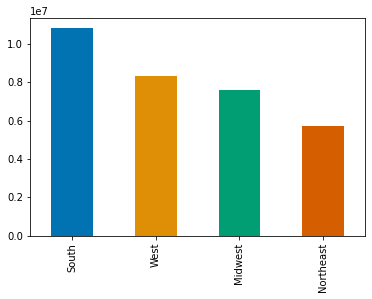

In [122]:
# Create bar chart to visualize difference between regions
bar_region = df_prods_ords_customers['Region'].value_counts().plot.bar(color=sns.color_palette('colorblind'))

In [123]:
# Export this chart
bar_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_Customer_Totals.png'), bbox_inches = 'tight')

In [124]:
# create crosstab of department_name and region
region_depts = pd.crosstab(df_prods_ords_customers['department_name'], df_prods_ords_customers['Region'], dropna = False)

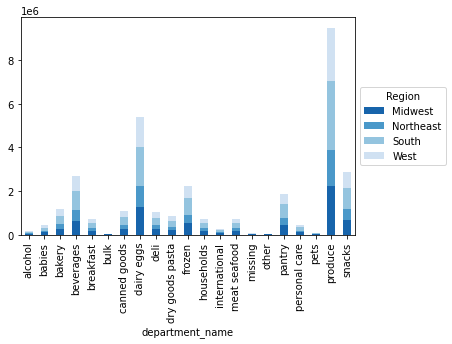

In [145]:
# Create a bar chart of this crosstab
bar_region_depts = region_depts.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r", 4))
plt.legend(title = 'Region',loc='center left', bbox_to_anchor=(1, 0.5))

In [146]:
# Export this chart
bar_region_depts.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_Depts_Difference.png'), bbox_inches = 'tight')

In [127]:
# create crosstab of age_bracket and region
region_age = pd.crosstab(df_prods_ords_customers['age_bracket'], df_prods_ords_customers['Region'], dropna = False)

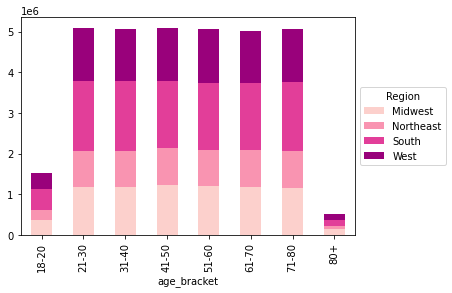

In [128]:
# Create a bar chart of this crosstab
bar_region_age = region_age.plot(kind='bar', stacked=True, color = sns.color_palette("RdPu", 4))
plt.legend(title = 'Region',loc='center left', bbox_to_anchor=(1, 0.5))

In [129]:
# Export this chart
bar_region_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_Age_Difference.png'), bbox_inches = 'tight')

In [130]:
# create crosstab of fam_status and region
region_income_bracket = pd.crosstab(df_prods_ords_customers['income_range'], df_prods_ords_customers['Region'], dropna = False)

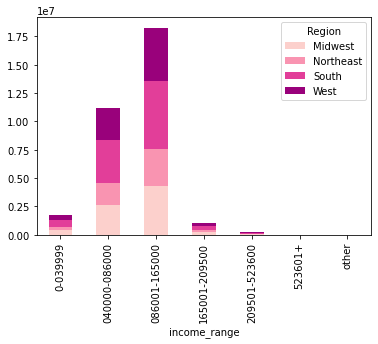

In [131]:
# Create a bar chart of this crosstab
bar_region_income_bracket = region_income_bracket.plot(kind='bar', stacked=True, color = sns.color_palette("RdPu", 4))

In [132]:
# Export this chart
bar_region_income_bracket.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_Income_Difference.png'),bbox_inches = 'tight')

In [133]:
# Export the dataset
df_prods_ords_customers.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_all_2.pkl'))

In [137]:
# Region and Top 20 products 
region_top_5_depts = pd.crosstab(df_top_selling_prods['product_name'], df_top_selling_prods['Region'], dropna = False)

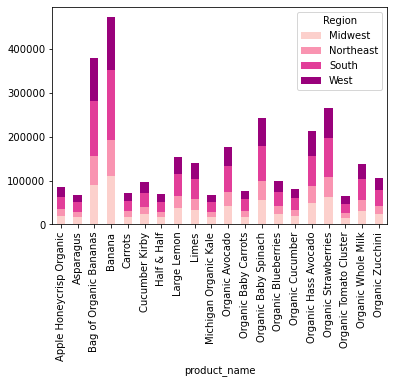

In [138]:
# Create a bar chart of these top products by region
bar_region_top_products = region_top_5_depts.plot(kind='bar', stacked=True, color = sns.color_palette("RdPu", 4))

In [139]:
# Export this chart
bar_region_top_products.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_Top_Products.png'),bbox_inches = 'tight')

In [140]:
# Region and Time of Day Ordering
region_time_of_day = pd.crosstab(df_prods_ords_customers['time_of_day'], df_prods_ords_customers['Region'], dropna = False)

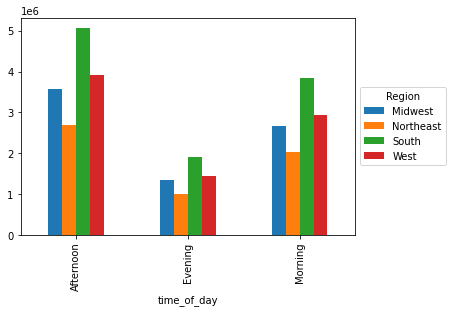

In [143]:
# Create a bar chart of orders time of day between regions
bar_region_time_of_day = region_time_of_day.plot.bar()
plt.legend(title = 'Region',loc='center left', bbox_to_anchor=(1, 0.5))

In [144]:
# Export this chart
bar_region_time_of_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region_time_of_day.png'),bbox_inches = 'tight')